### Часть 1. Дихотомия и Золотое сечение

Заранее извиняюсь за технический вывод библиотеки для построения графиков matplotlib. Не смог разобраться, как его убрать.

In [ ]:
#Эта ячейка нужна, чтобы можно было один раз все импортировать
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jax import grad
import jax.numpy as jnp
import torch as tr
import time
from random import randint
plt.style.use('seaborn-darkgrid')

<ipython-input-30-ea3e0d85fa90>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


__Определение__ Одномерная функция $f: [a,b] \to \mathbb{R}$ называется унимодальной на отрезке $[a,b]$, если существует $c^* \in [a,b]$ такое, что

1) для любых $a \leq x < y \leq c^*$ имеем $f(x) > f(y)$,

2) для любых $c^* \leq x < y \leq b$ имеем $f(x) < f(y)$.

В этом задании будем минимизировать такого рода функции.

__Задача 1. (всего 15 баллов)__ Рассмотрим метод дихотомии:

```python
def binpoisk(f, a, b, eps):
    c = (a + b) / 2
    while (b - a) > eps:
        d = (a + c) / 2
        if f(d) <= f(c):
            b = c
            c = d
        else:
            e = (b + c) / 2
            if f(c) <= f(e):
                a = d
                b = e
            else:
                a = c
                c = e
    return c
```

__а). (4 балла)__ Докажите корректность и сходимость данного алгоритма для нахождения минимума унимодальной функции.

Эта функция должна искать минимум унимодальной функции **`f`** на отрезке **`[a, b]`**, а мы должны доказать корректность нахождения этого минимума.<br>
Доказательство: <br>
Пусть эта функция находит минимум неправильно, то есть ее ответом была некоторая точка **$t_{1}$**, а правильный ответ - точка **$t_{2}$**, причем ∃ϵ > 0 |$t_{2}$ - $t_{1}$| > ϵ (иначе алгоритм работает верно, в силу небольшой погрешности, которая в нем предположена). Проанализируем, как работал наш алгоритм. (Также не умаляя общности, предположим, что $t_{2}$ находится в правой половине отрезка [a, b], чтобы не разбирать большое количество аналогичных случаев). <br>
Вначале алгоритм берет середину `c` отрезка [a, b] и середину `d` отрезка [a, c]. По нашему предположению f(d) будет больше f(c), а f(c) будет больше f(e), где `e` - середина [b, c] по определению унимодальной функции на отрезке [a, b]. То есть первые несколько шагов (возможно один) бинарный поиск будет сдвигать a вправо (каждый раз к середине нового отрезка [a, b]), пока не наступит момент, когда f(c) станет меньше f(e) (то есть `c` будет ближе к минимуму, чем `e`). После этого, очевидно, алгоритм (некоторое количество шагов) будет уменьшать отрезок [a, b] в 2 раза, сужая его около минимума. После он будет чередовать сдвиг левой и правой границы [a, b] (точки d и e будут по очереди ближе к минимуму, чем непосредственно середина отрезка [a, b]) и в какой-то момент длина отрезка [a, b] станет непренебрежимо малой, то есть |b - a| < ϵ ∀ϵ > 0. Тут наш алгоритм закончит работу и выдаст ответ **$t_{1}$**. Но так как бинарный поиск всегда сдвигал границы к настоящему минимуму (если на каком-то шаге алгоритм ошибся и сдвинул границы отрезка [a, b] так, что **$t_{2}$** оказалась вне границ [a, b], то мы можем говорить о некорректности данной нам функции `f`, так как иначе точка d, e или c (в зависимости от того куда сдвинулись границы отрезка) была бы ближе к минимуму, чем остальные две точки и граница бы сдвинулась правильно) получаем, что точка **$t_{2}$** также попала в конечный отрезок [a, b], а значит расстояние между **$t_{2}$** и **$t_{1}$** также <ϵ ∀ϵ > 0. Получили противоречие с предположением о расстоянии между этими точками. Следовательно алгоритм правильно находит минимум функции `f` с некоторой пренебрежимо маленькой погрешностью.


__б). (6 баллов)__ Какова будет итерационная и оракульная сложность данного алгоритма для достижения точности $\varepsilon$ (а именно, $|c_{out} - c^*| \leq \varepsilon$)? Т.е. необходимо получить верхнюю оценку на число итераций и подсчета значений $f$ метода дихотомии для минимизации унимодальных функций.

Алгоритм достигнет точности ϵ, когда мы поделим длину отрезка [a, b] достаточное число раз. Конкретнее: $(a + b) / 2^k <= ϵ$. Так как мы хотим получить верхнюю оценку, рассмотрим такое неравенство $(a + b) / 2 ^ {k - 1} >= ϵ$. Его решением является k <= $log_{2}((a + b) / ϵ) + 1$ (мы считаем, что все вычисления внутри, такие как: вычисление функции, сравнения и присваивания, считаются за O(1). Это и будет нашей итерационной сложностью. Теперь дадим верхнюю оценку на оракульную сложность. За одну итерацию бинарного поиска может потребоваться 4 вычисления значения функции (один раз f(d) <= f(c) и второй раз f(c) <= f(e)), а значит oracle_complexity <= $4log_{2}((a + b) / ϵ) + 4$.

__в). (2 балла)__ Придумайте свою унимодальную функцию (постарайтесь придумать не самый тривиальный пример, если совсем не получается обратите внимание на функцию $f(x) = \sin x \cdot e^x$ и модернизируйте ее). Покажите, что она является унимодальной на каком то отрезке. Где у нее находится $c^*$?

Рассмотрим функцию Растригина f(x) = $x^2 - 10cos(2πx) + 10$ на отрезке [-0.5, 0.5]. Нетрудно заметить, что она убывает на первой его половине, в точке 0 имеет глобальный минимум и возрастает после нуля. (В реализации кода выше был взят отрезок [-0.498, 0.5], чтобы алгоритм сразу не попадал в центр и выдавал ответ с видимой нам погрешностью для большей четкости эксперимента).

__г). (3 балла)__ Реализуйте и запустите для этой функции метод дихотомии. Постройте 2 графика сходимости:

1) по оси абцисс - число итераций, по оси ординат - $|c_{out} - c^*|$,

2) по оси абцисс - число оракульных вызовов $f$, по оси ординат - $|c_{out} - c^*|$.

Нанесите на оба графика теоретическую оценку из пункта а). Сделайте вывод.

Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (так как на каждом графике будет две линии), толщина линий и т.д.. Графики должны быть удобны для чтения.

1.0430812828389261e-08 - целевое значение функции (минимум)


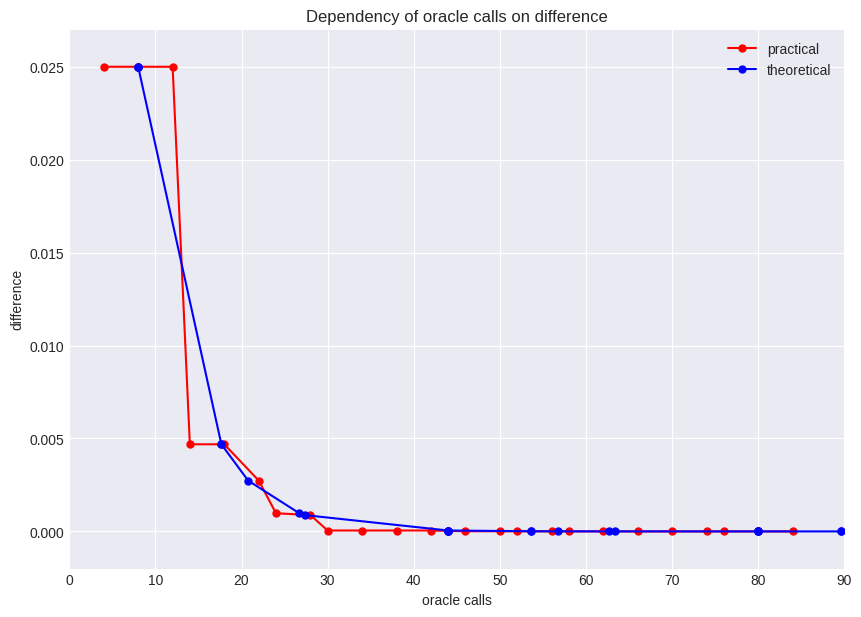

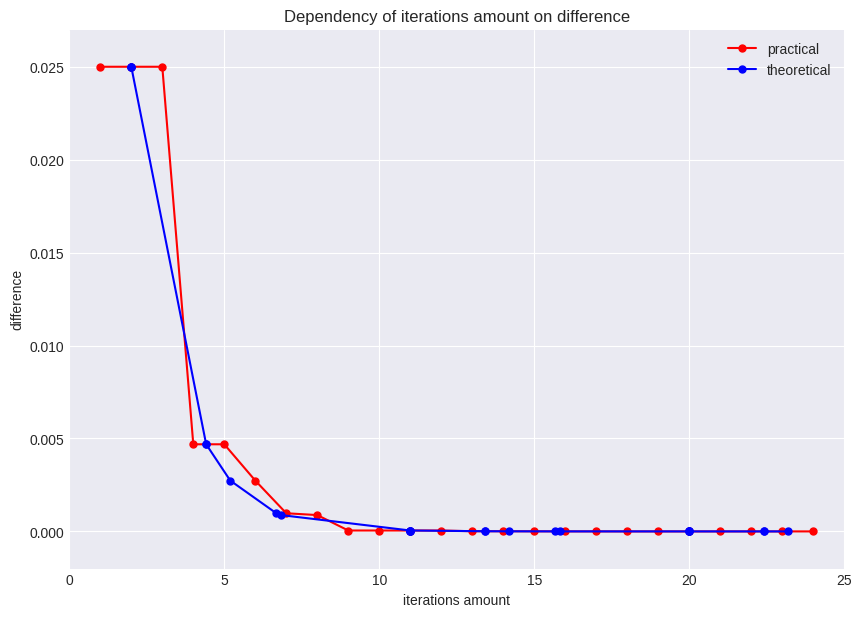

In [ ]:
#Эти переменные для хранения дополнительной информации
information = []
f_calls = 0
iterations_amount = 0

# Рассматриваемая целевая функция
def f(x):
  return x**2 - 10 * np.cos(2 * np.pi * x) + 10;

#Метод дихотомии
def binpoisk(f, a, b, eps):
    global f_calls
    global iterations_amount
    global information
    c = (a + b) / 2
    while (b - a) > eps:
        iterations_amount += 1
        d = (a + c) / 2
        f_calls += 2
        if f(d) <= f(c):
            b = c
            c = d
        else:
            e = (b + c) / 2
            f_calls += 2
            if f(c) <= f(e):
                a = d
                b = e
            else:
                a = c
                c = e
        information.append([f_calls, iterations_amount, c - 0])
    return c

#Выводим моду
print(binpoisk(f, -0.45, 0.5, 0.0000001), "- целевое значение функции (минимум)");
#Строим графики
f_calls = []
difference = []
theoretical_f_calls = []
theoretical_iterations_amount = []
iterations_amount = []
#Сначала всю собранную информацию переносим в вспомогательные массивы,
#чтобы построить графики
for i in information:
  f_calls.append(i[0])
  iterations_amount.append(i[1])
  difference.append(i[2])
  theoretical_iterations_amount.append(np.log2(0.05 / abs(i[2])) + 1)
  theoretical_f_calls.append(4 * np.log2(0.05 / abs(i[2])) + 4)
#Построение графиков
plt.figure(figsize = (10, 7))
plt.plot(f_calls, np.absolute(difference), marker = 'o', markersize = 5, color = 'r', label = "practical")
plt.plot(theoretical_f_calls, np.absolute(difference), marker = 'o', markersize = 5, color = 'b', label = "theoretical")
plt.xlabel("oracle calls")
plt.ylabel("difference")
plt.title("Dependency of oracle calls on difference")
plt.legend()
plt.xlim([0, 90])
plt.ylim([-0.002, 0.027])
plt.show()
plt.figure(figsize = (10, 7))
plt.plot(iterations_amount, np.absolute(difference), marker = 'o', markersize = 5, color = 'r', label = "practical")
plt.plot(theoretical_iterations_amount, np.absolute(difference), marker = 'o', markersize = 5, color = 'b', label = "theoretical")
plt.xlabel("iterations amount")
plt.ylabel("difference")
plt.title("Dependency of iterations amount on difference")
plt.legend()
plt.xlim([0, 25])
plt.ylim([-0.002, 0.027])
plt.show()

**Вывод**: практические и теоретические итерационные и оракульные сложности алгоритма очень близки друг к другу, что значит, что и в том и в другом случае они были посчитаны правильно, возможно с небольшой погрешностью. Можно даже увидеть, что обе оценки имеют примерно логарифмический график, что и вложено в основу бинарного поиска, который мы применяли для решения искомой задачи.

__Задача 2. (всего 10 баллов)__ Рассмотрим метод золотого сечения:

```python
def binpoisk(f, a, b, eps):
    tau = (1 + sqrt(5)) / 2
    while (b - a) > eps:
        t = (b - a) / tau
        c = b - t
        d = a + t
        if f(d) <= f(c):
            a = c
        else:
            b = d
    return (a + b) / 2
```

__а). (2 балла)__ Докажите корректность и сходимость данного алгоритма для нахождения минимума унимодальной функции.

Доказательство этого пункта можно провести абсолютно аналогично доказательству корректности предыдущего алгоритма. Там мы делили отрезок каждый раз в 2 раза, а тут уменьшаем в 0.62 раза, а значит категорически смысл алгоритма никак не меняется.

__б). (5 баллов)__ Какова будет итерационная и оракульная сложность данного алгоритма для достижения точности $\varepsilon$ (а именно, $|c_{out} - c^*| \leq \varepsilon$)? Лучше или хуже данный алгоритм, чем метод дихотомии?

_Hint:_ возможно ли улучшения псевдокода метода золотого сечения с точки зрения оракульной сложности?

Рассмотрим сначала итерационную сложность алгоритма, а уже из нее получим оракульную и даже улучшим ее. Пусть `λ` = 1/τ. Теперь рассмотрим два варианта: <br>
- `x1` = b - (b - a) / τ, меняем a = x1
- `x2` = a + (b - a) / τ, меняем b = x2

Теперь рассмотрим $Δ_{k}$ - длина отрезка на k-ой итерации.<br>
1) $Δ_{0}$ = b - a<br>
2) $Δ_{1}$ = λ(b - a)<br>
...<br>
k) $Δ_{k}$ = $λ^k$(b - a)<br>
Теперь по аналогии с бинарным поиском посчитаем количество итераций.<br>
(b - a) * $λ^{k - 1}$ >= ϵ <=> k <= $log_{λ}(\epsilon / (b - a)) + 1$<br>
Теперь мы можем дать верхнуюю оценку на оракульную сложность конкретно для этого алгоритма. Так как за каждую итерацию мы вычычисляем значение функции ровно 2 раза, то k <= $2log_{λ}(ϵ / (b - a)) + 2$. Теперь подумаем, можно ли улучшить эту оценку?<br>
Мы выбираем точки **$x_{1}$** и **$x_{2}$**, такие, что $x_{1}$ - точка золотого сечения отрезка [a, $x_{2}$], а $x_{2}$ - точка золотого сечения отрезка [$x_{1}$, b]. Тогда на каждом шаге нам не надо вычислять значение функции дважды, так как мы вычислям значение в новой точке, а также берем одно значение с прошлого шага. Расчет в таком случае также немного изменится:<br>
- Если f($x_{1}$) > f($x_{2}$), то a = $x_{1}$, $x_{1} = x_{2}$, $x_{2} = b - (x_{1} - a)$
- Если f($x_{1}$) <= f($x_{2}$), то b = $x_{2}$, $x_{2} = x_{1}$, $x_{1} = a + (b - x_{2})$

Несложно заметить, что тогда оракульная сложность уменьшается ровно в 2 раза и становится равной итерационной.


__в). (3 балла)__ Реализуйте метод золотого сечения. Добавьте результаты золотого сечения (теоретические и практические) на графики из пункта 1.г. Сделайте вывод.

-2.2272273947964242e-08 - целевое значение функции (минимум)


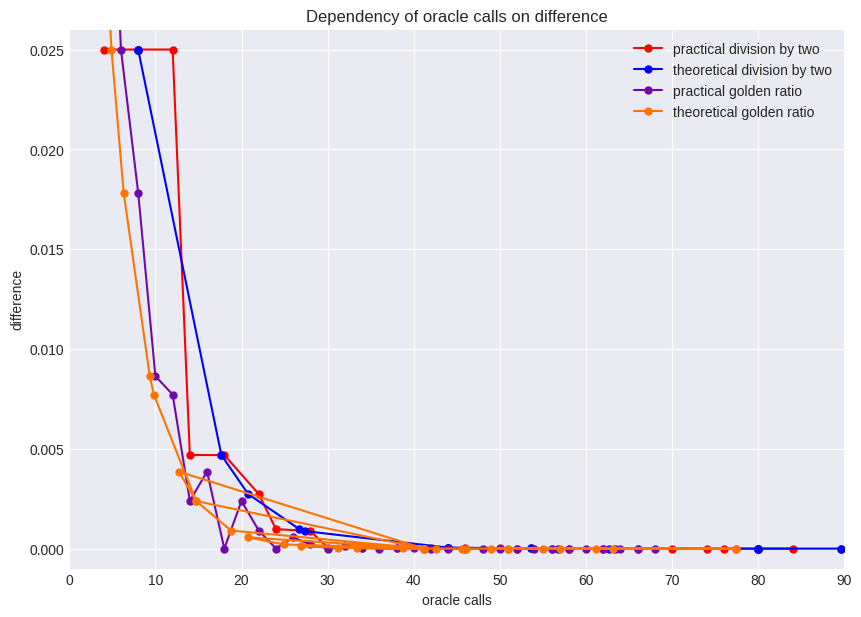

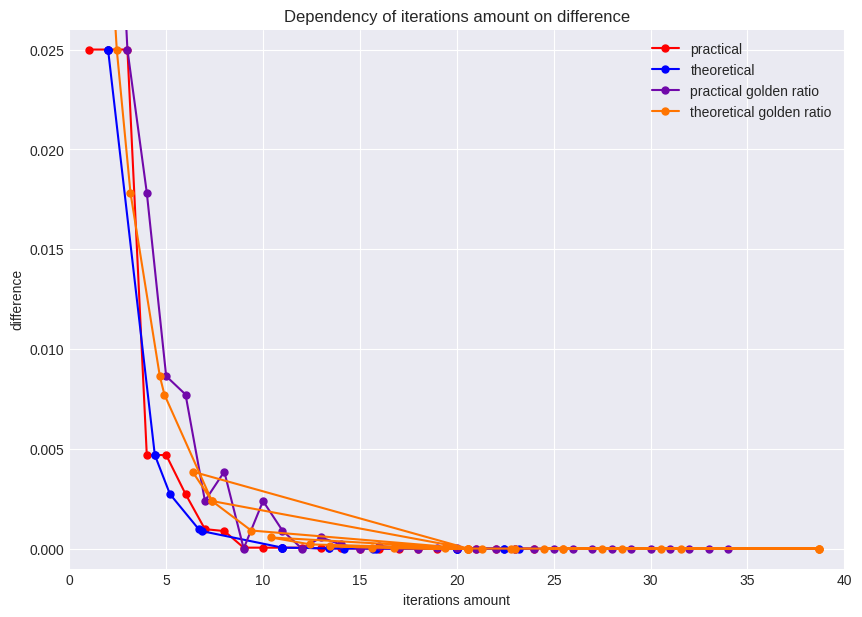

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt


information_gold = []
f_calls_gold = 0
iterations_amount_gold = 0

# Рассматриваемая целевая функция
def f(x):
  return x**2 - 10 * np.cos(2 * np.pi * x) + 10;

#Метод золотого сечения
def binpoisk(f, a, b, eps):
    global f_calls_gold
    global iterations_amount_gold
    global information_gold
    tau = (1 + sqrt(5)) / 2
    while (b - a) > eps:
        t = (b - a) / tau
        c = b - t
        d = a + t
        f_calls_gold += 2
        iterations_amount_gold += 1
        if f(d) <= f(c):
            a = c
        else:
            b = d
        information_gold.append([f_calls_gold, iterations_amount_gold, (a + b) / 2])
    return (a + b) / 2


#Выводим моду
print(binpoisk(f, -0.45, 0.5, 0.0000001), "- целевое значение функции (минимум)");
f_calls_gold = []
difference_gold = []
theoretical_f_calls_gold = []
theoretical_iterations_amount_gold = []
iterations_amount_gold = []
#Сначала всю собранную информацию переносим в вспомогательные массивы,
#чтобы построить графики
for i in information_gold:
  f_calls_gold.append(i[0])
  iterations_amount_gold.append(i[1])
  difference_gold.append(i[2])
  theoretical_iterations_amount_gold.append(np.emath.logn(0.62, (abs(i[2]) / 0.05)) + 1)
  theoretical_f_calls_gold.append(2 * np.emath.logn(0.62, (abs(i[2]) / 0.05)) + 2)
#Строим графики
plt.figure(figsize = (10, 7))
plt.plot(f_calls, np.absolute(difference), marker = 'o', markersize = 5, color = 'r', label = "practical division by two")
plt.plot(theoretical_f_calls, np.absolute(difference), marker = 'o', markersize = 5, color = 'b', label = "theoretical division by two")
plt.plot(f_calls_gold, np.absolute(difference_gold), marker = 'o', markersize = 5, color = '#7109AA', label = "practical golden ratio")
plt.plot(theoretical_f_calls_gold, np.absolute(difference_gold), marker = 'o', markersize = 5, color = '#FF7400', label = "theoretical golden ratio")
plt.xlabel("oracle calls")
plt.ylabel("difference")
plt.title("Dependency of oracle calls on difference")
plt.legend()
plt.xlim([0, 90])
plt.ylim([-0.001, 0.026])
plt.show()
plt.figure(figsize = (10, 7))
plt.plot(iterations_amount, np.absolute(difference), marker = 'o', markersize = 5, color = 'r', label = "practical")
plt.plot(theoretical_iterations_amount, np.absolute(difference), marker = 'o', markersize = 5, color = 'b', label = "theoretical")
plt.plot(iterations_amount_gold, np.absolute(difference_gold), marker = 'o', markersize = 5, color = '#7109AA', label = "practical golden ratio")
plt.plot(theoretical_iterations_amount_gold, np.absolute(difference_gold), marker = 'o', markersize = 5, color = '#FF7400', label = "theoretical golden ratio")
plt.xlabel("iterations amount")
plt.ylabel("difference")
plt.title("Dependency of iterations amount on difference")
plt.legend()
plt.xlim([0, 40])
plt.ylim([-0.001, 0.026])
plt.show()

### Часть 2. Матрично-векторное дифференцирование. Теория

В этой части используется следующие обозначения:

$\mathbb{R}_+$ - неотрицательные вещественные числа

$\mathbb{R}_{++}$ - положительные вещественные числа

$I_d$ - матрица с единицами на диагонали (вне диагонали 0)

$A \in \mathbb{S}^d \quad\Longleftrightarrow \quad A= A^\top$

$A \in \mathbb{S}^d_+ \quad\Longleftrightarrow \quad A \in \mathbb{S}^d ; \quad  \forall x: \quad  x^\top Ax \geq 0$

$A \in \mathbb{S}^d_{++}\quad \Longleftrightarrow \quad A \in \mathbb{S}^d ; \quad \forall x \neq 0: \quad  x^\top Ax > 0$

Норма Фробениуса для матрицы $A \in \mathbb{R}^{d \times d}$ определяется как $||A||_F = \sqrt{\sum_{i=1}^d \sum_{j=1}^d A^2_{ij}}$

Для матриц скалярное произведение определено как $\langle X, Y \rangle := \text{Tr}(X^\top Y)$

__Задача 1. (всего 5 баллов)__ Вычилите первую и вторую производные $f'(t)$ и $f''(t)$ для следующих функций:

__а). (2 балла)__ $f : E \to \mathbb{R}$ - функция $f(t) := \det(A - t I_d)$, где $A \in \mathbb{R}^{d \times d}$, $E := \{ t \in \mathbb{R} : \det(A - t I_d) \neq 0 \}$.

С семинаров мы знаем, что d(det(X)) = det(X)⟨$X^{-T}$, dX⟩<br>
Дополнительный вывод: dTr($X^{-1}$) = Tr(d$X^{-1}$) = Tr($-X^{-1} * dX * X^{-1}$) = Tr($-X^{-2}dX$) = ⟨-$X^{-2}$, dX⟩<br>
$df$ = d(det(A - t$I_{d}$)) = det(A - t$I_{d}$) * ⟨$(A - tI_{d})^{-T}$, d(A - t$I_{d}$)⟩ = det(A - t$I_{d}$) * ⟨$(A - tI_{d})^{-T}$, -$I_{d}dt$⟩ = -det(A - t$I_{d}$) * Tr($(A - tI_{d})^{-1}$)dt<br>
$d^2f$ = d$f^{'}(t)$ = -d(det(A - t$I_{d}$) * Tr($[A - tI_{d}]^{-1}$)dt) = det(A - t$I_{d}$) * $Tr^{2}$($[A - tI_{d}]^{-1}$)dt^2 - det(A - t$I_{d}$) * Tr([A - t$I_{d}]^{-2}$)dt^2<br>
**Ответ:** $f^{'}(t) = -det(A - tI_{d}) * Tr((A - tI_{d})^{-1})$, $f^{''}(t) = det(A - tI_{d}) * Tr^{2}([A - tI_{d}]^{-1}) - det(A - tI_{d}) * Tr([A - tI_{d}]^{-2})$.

__б). (3 балла)__ $f : \mathbb{R}_{++} \to \mathbb{R}$ - функция $f(t) := \| (A + t I_d)^{-1} b \|^2$, где $A \in \mathbb{S}^d_{++}$, $b \in \mathbb{R}^d$.

Если A - симметричная, то (A+t$I_{d}$) - тоже симметричная в силу изменения только диагональных элементов.<br>
Дополнительно используем: $d(X^{-1}) = X^{-1} * dX * X^{-1}$<br>
Тогда $df = d(||(A + tI_{d})^{-1}b||^2) = ⟨d((A + tI_{d})^{-1}b), (A + tI_{d})^{-1}b⟩ = 2⟨-(A + tI_{d})^{-1} * I_{d} * (A + tI_{d})^{-1}bdt, (A + tI_{d})^{-1}b⟩ = -2((A + tI_{d})^{-1}b)^Tdt * (A + tI_{d})^{-2}b = -2b^T * (A + tI_{d})^{-3}bdt$.<br>
$f^{'}(t) = -2b^T * (A + tI_{d})^{-3}b$<br>
Тут мы пользовались свойством симметрической матрицы, что A = $A^T$.<br>
$d^2f$ = $d(-2b^T * (A + tI_{d})^{-3}bdt)$.<br>
1)$d((A + tI_{d})^{-2}) = -2(A + tI_{d})^{-1} * (A + tI_{d})^{-2}dt = -2(A + tI_{d})^{-3}dt$<br>
2) d$(A + tI_{d})^{-3} = -3(A + tI_{d})^{-2} * d(A + tI_{d})^{-1} = -3(A + tI_{d})^{-4}dt$<br>
Продолжаем вычисления: $d(-2b^T * (A + tI_{d})^{-3}bdt) = -2b^T * d((A + tI_{d})^{-3})bdt = 6b^T(A + tI_{d})^{-4}bdt^2$.<br>
$f^{''}(t) = 6b^T(A + tI_{d})^{-4}b$.


__Задача 2. (всего 9 баллов)__ Вычислите градиент $\nabla f$ и гессиан $\nabla^2 f$ для следующих функций:

__а). (4 балла)__ $f : \mathbb{R}^d \to \mathbb{R}$ - функция $f(x) := \frac{1}{2} \| x x^T - A \|_F^2$, где $A \in \mathbb{S}_{++}^d$.

Пользуемся фактом: $d(||x||) = ⟨\frac{x}{||x||}, dx⟩$. Также $xx^T$ - симметричная матрица, а значит $xx^T - A$ - тоже симметричная.<br>
$df = \frac{1}{2}d(||xx^T - A||^2_{F}) = \frac{1}{2} * 2 * ||xx^T - A||_{F} * ⟨\frac{xx^T - A}{||xx^T - A||_{F}}, d(xx^T - A)⟩ = ⟨xx^T - A, dx*x^T⟩ + ⟨xx^T - A, xd(x^T)⟩ = ⟨(xx^T - A)x, dx⟩ + ⟨(xx^T - A)dx, x⟩ = ⟨(xx^T - A)x, dx⟩ + ⟨dx, (xx^T - A)x⟩ = 2⟨(xx^T - A)x, dx⟩$<br> В преподследнем переходе мы пользовались симметричностью. Отсюда ∇f = $2(xx^T - A)x$.<br>
$d^2f = 2d(⟨dx_{1}, (xx^T - A)x⟩) = 2⟨dx_{1}, (xx^T - A)dx⟩ + 2⟨dx_{1}, x^Tdx*x⟩ + 2⟨dx_{1}, xd(x^T)x⟩ = 2⟨(xx^T - A)dx_{1}, dx⟩ + 2⟨xx^Tdx_{1}, dx⟩ + 2⟨x^Txdx_{1}, dx⟩ => ∇^2f = 2x^Tx - 2A + 4xx^T.$

__б). (5 баллов)__ $f : \mathbb{R}^d \setminus \{ 0 \} \to \mathbb{R}$ - функция $\displaystyle f(x) = \langle x, x \rangle^{\langle x, x \rangle}$.

$f = e^{⟨x, x⟩ln⟨x, x⟩}$. $df = d(e^{⟨x, x⟩ln⟨x, x⟩}) = ⟨x, x⟩^{⟨x, x⟩} * d(⟨x, x⟩ln(⟨x, x⟩) = ⟨x, x⟩ ^ {⟨x, x⟩} * (2⟨x, dx⟩ln(⟨x, x⟩) + \frac{2⟨x, dx⟩}{⟨x, x⟩}*⟨x, x⟩) = 2⟨x, x⟩^{⟨x, x⟩} * ⟨x, dx⟩(ln⟨x, x⟩ + 1) = ⟨2⟨x, x⟩^{⟨x, x⟩}x(ln⟨x, x⟩ + 1), dx⟩$.<br> Значит $∇f = 2⟨x, x⟩^{⟨x, x⟩}x(ln⟨x, x⟩ + 1)$.

__Задача 3. (всего 11 баллов)__ Для каждой из следующих функций $f$ покажите, что вторая производная является знакоопределенной (как квадратичная форма) и установите ее знак:

__а). (5 баллов)__ $f : \mathbb{R}^d_{++} \to \mathbb{R}$ - функция $f(x) := \prod_{i=1}^d x_i^{\alpha_i}$, где $\alpha_1, \dots, \alpha_d \geq 0$, $\sum_{i=1}^d \alpha_i = 1$.

Для начала посчитаем первый и второй градиент этой функции.<br>
$\frac{df}{dx_{i}} = d(\prod_{i = 1}^d x_i^{α_i}) = \alpha_ix_i^{-1}(\prod_{i=1}^d x_i^{\alpha_i})$.<br>
$\frac{d^2f}{dx_i^2} = -\alpha_ix_i^{-2}\prod_{i=1}^d x_i^{\alpha_i} + \alpha_i^2x_i^{-2}\prod_{i=1}^d x_i^{\alpha_i}$.<br>
$\frac{d^2f}{dx_idx_j} = \alpha_i\alpha_jx_i^{-1}x_j^{-1}\prod_{i=1}^d x_i^{\alpha_i}$.<br>
А теперь определим знак определителя соотвествующей матрицы, учитывая, что $\prod_{i=1}^d x_i^{\alpha_i} > 0$.

$\begin{vmatrix}
\frac{\alpha_1^ 2 - \alpha_1}{x_1^2} & \frac{\alpha_1\alpha_2}{x_1x_2} & \frac{\alpha_1\alpha_3}{x_1x_3} & \dots & \frac{\alpha_1\alpha_d}{x_1x_d}\\
\frac{\alpha_2\alpha_1}{x_2x_1} & \frac{\alpha_2^ 2 - \alpha_2}{x_2^2} & \frac{\alpha_2\alpha_3}{x_2x_3} & \dots & \frac{\alpha_2\alpha_d}{x_2x_d}\\
& & \dots\dots \\
\frac{\alpha_d\alpha_1}{x_dx_1} & &\dots \dots &  & \frac{\alpha_d^ 2 - \alpha_d}{x_d^2}\\
\end{vmatrix}  =  \prod_{i=1}^d (\frac{\alpha_i}{x_i}) * \begin{vmatrix}
\frac{\alpha_1 - 1}{x_1} & \frac{\alpha_2}{x_2} & \frac{\alpha_3}{x_3} & \dots & \frac{\alpha_d}{x_d}\\
\frac{\alpha_1}{x_1} & \frac{\alpha_2 - 1}{x_2} & \frac{\alpha_3}{x_3} & \dots & \frac{\alpha_d}{x_d}\\
& & \dots\dots \\
\frac{\alpha_1}{x_1} & &\dots \dots &  & \frac{\alpha_d - 1}{x_d}\\
\end{vmatrix}$

 Знаем, что $\prod_{i=1}^d (\frac{\alpha_i}{x_i}) \geq 0$.

$\text{sign}\begin{vmatrix}
\frac{\alpha_1 - 1}{x_1} & \frac{\alpha_2}{x_2} & \frac{\alpha_3}{x_3} & \dots & \frac{\alpha_d}{x_d}\\
\frac{\alpha_1}{x_1} & \frac{\alpha_2 - 1}{x_2} & \frac{\alpha_3}{x_3} & \dots & \frac{\alpha_d}{x_d}\\
& & \dots\dots \\
\frac{\alpha_1}{x_1} & \frac{\alpha_2}{x_2} &\dots \dots &  & \frac{\alpha_d - 1}{x_d}\\
\end{vmatrix} = \text{sign}\begin{vmatrix}
\alpha_1 - 1 & \alpha_2 & \alpha_3 & \dots & \alpha_d \\
\alpha_1 & \alpha_2 - 1 & \alpha_3 & \dots & \alpha_d \\
& & \dots\dots \\
\alpha_1 & \alpha_2 &\dots \dots & & \alpha_d - 1 \\
\end{vmatrix}  = $

$= \text{sign} \begin{vmatrix}
- 1 & 0 & 0 & \dots & 1 \\
0 & - 1 & 0 & \dots & 1 \\
& & \dots\dots \\
\alpha_1 & \alpha_2 &\dots \dots &  & \alpha_d - 1 \\
\end{vmatrix} = \text{sign} \begin{vmatrix}
- 1 & 0 & 0 & \dots & 1 \\
0 & - 1 & 0 & \dots & 1 \\
& & \dots\dots \\
0 & 0 &\dots \dots &  & (\sum\limits_{i=1}^d\alpha_i) - 1 \\
\end{vmatrix} = $

$= \text{sign} \begin{vmatrix}
- 1 & 0 & 0 & \dots & 1 \\
0 & - 1 & 0 & \dots & 1 \\
& & \dots\dots \\
0 & 0 &\dots \dots &  & 0 \\
\end{vmatrix} $
<br>
С курса аналитической геометрии и линейной алгебры мы знаем, что знак определителя (да и сам определитель) не меняется при элементарных преобразованиях с строками и столбцами (именно их мы тут и проводили, то есть домножение строки, вычитание одной строки из другой). Теперь, полагаясь на критерий Сильвестра, критерий главных определителей для полуопределенных матриц или просто подсчитав собственные значения (их будет d штук, d - 1 будут равны -1 и еще одно будет равно 0), мы можем с уверенностью сказать, что данная матрица будет отрицательно полуопределенная.<br>
**Вывод:** `отрицательно полуопределенная.`

__б). (6 баллов)__ $f : \mathbb{S}^d_{++} \to \mathbb{R}$ - функция $f(X) := \langle X^{-1}, A \rangle$, где $A \in \mathbb{S}^d_+$.

Для решения этой задачи придется воспользоваться немного другим способ подсчета дифференциалов (так показывал преподаватель на семинаре, а пользоваться выкладками с семинара не запрещено). А конкретно, через приращения. Стандартные обозначения (X, Y, Z - матрицы, H - матрица приращения). Опять же, мы знаем тот факт, что $dg(X)[H] = X^{-1}HX^{-1}$ - на семинарах выводилось уже больше 3 раз. Тут $g(X) = X^{-1}$.<br>
Тогда $df(X)[H] = ⟨X^{-1}HX^{-1}, A⟩$.<br>
Считаем второй диф-л:<br>
1) $df(X + Y)[H] = ⟨-(X + Y)^{-1}H(X + Y)^{-1}, A⟩ = ⟨-(X^{-1} - X^{-1}YX^{-1} + o(||Y||))H(X^{-1} - X^{-1}YX^{-1} + o(||Y||)), A⟩ = df(X)[H] + ⟨X^{-1}HX^{-1}YX^{-1} + X^{-1}YX^{-1}HX^{-1}, A⟩ + o(||Y||)$.<br> Причем $o(||Y||) -> 0$, так как Y - приращение.<br>
Итогу $d^2f(X)[H][Y] = ⟨X^{-1}HX^{-1}YX^{-1}, A⟩ + ⟨X^{-1}YX^{-1}HX^{-1}, A⟩ = tr(X^{-1}HX^{-1}YX^{-1}A) + tr(X^{-1}YX^{-1}HX^{-1}A)$.<br>
Рассмотрим теперь такое выражение: $X^{-1}HX^{-1}HX^{-1} \in \mathbb{S}^d_+$ (тут H берется из $\mathbb{R}^{d \times d}$)<br>
Проверим это по определению: $∀x \in \mathbb{R}^d -> x^TX^{-1}HX^{-1}HX^{-1}x = (HX^{-1}x)^TX^{-1}(ZX^{-1}x) \geq 0$, т.к. $X^{-1} \in \mathbb{S}_{++}^d$ - из условия.<br>
Тогда $tr(X^{-1}HX^{-1}HX^{-1}A) \geq 0$ - след произведения положительно полуопределенных матриц, а значит $d^2f(X)[H][Y] \in \mathbb{S}_+^d$.

__Задача 4. (5 баллов)__ Для указанного графа вычислений найдите градиент $\nabla_A L, \nabla_b L$ функции потерь $L$ по входным переменным $A,b$ соответственно. Градиент по $x$ считать известным и равным $\nabla_x L$. Рекомендуется использовать алгоритм backpropogation.

![%D0%A1%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA%20%D1%8D%D0%BA%D1%80%D0%B0%D0%BD%D0%B0%202023-09-09%20%D0%B2%2022.49.24.png](attachment:%D0%A1%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA%20%D1%8D%D0%BA%D1%80%D0%B0%D0%BD%D0%B0%202023-09-09%20%D0%B2%2022.49.24.png)

$dL = ⟨∇_xL, dx⟩ = ⟨∇_xL, d_A(A^{-1}b)⟩ = ⟨∇_xL, -A^{-1}dA \cdot A^{-1}b⟩ = ⟨-A^{-T}∇_xL \cdot b^TA^{-T}, dA⟩$. А так как $dL = ⟨∇_AL, dA⟩$, получаем, что $∇_AL = -A^{-T}∇_xL \cdot b^TA^{-T}$.<br>
$dL = ⟨∇_xL, A^{-1}d(b)⟩ = ⟨A^{-T}∇_xL, db⟩$. А так как $dL = ⟨∇_bL, db⟩$, получаем, что $∇_bL = A^{-T}∇_xL$.

### Часть 3. Градиентный спуск

__Задача. (всего 25 баллов)__ Рассмотрим следуюущую задачу оптимизации:

\begin{equation}
\min_{x \in \mathbb{R}^d} \left[f(x) := \tfrac{1}{2} x^T A x - b^T x\right],
\end{equation}
где $A \in \mathbb{R}^{d \times d}$, $b \in \mathbb{R}^d$.

__а). (2 балла)__ Является ли данная задача всегда выпуклой/сильной выпуклой? При каких условиях?

Сначала рассмотрим `выпулость`.<br>
Посчитаем градиент: $df = \frac{1}{2}d(x^T)Ax + \frac{1}{2}x^TAdx - b^Tdx = ⟨\frac{1}{2}Ax + \frac{1}{2}A^Tx - b, dx⟩$<br>
Отсюда следует, что $∇f = \frac{1}{2}(A + A^T)x - b$<br>
Теперь воспользуемся определением выпуклости: $∀x, y \in R^d : f(x) + ⟨∇f(x), y - x⟩ = \frac{1}{2}x^TAx - b^Tx + ⟨\frac{1}{2}(A + A^T)x - b, y - x⟩ = \frac{1}{2}x^TAx - b^Tx - b^Ty + b^Tx + \frac{1}{2}x^TA^Ty - \frac{1}{2}x^TA^Tx + \frac{1}{2}x^TAy - \frac{1}{2}x^TAx = -b^Ty + \frac{1}{2}x^TA^Ty - \frac{1}{2}x^TA^Tx + \frac{1}{2}x^TAy$.<br>
Теперь рассмотрим $f(y) - f(x) - ⟨∇f(x), y - x⟩ = \frac{1}{2}y^TAy - b^Ty - (-b^Ty + \frac{1}{2}x^TA^Ty - \frac{1}{2}x^TA^Tx + \frac{1}{2}x^TAy) = \frac{1}{2}y^TAy - \frac{1}{2}x^TA^Ty + \frac{1}{2}x^TA^Tx - \frac{1}{2}x^TAy = \frac{1}{2}y^TAy - \frac{1}{2}y^TAx + \frac{1}{2}x^TAx - \frac{1}{2}x^TAy = \frac{1}{2}(x - y)^TA(x - y)$.<br>
Отсюда делаем вывод, что матрица A должна лежать в $\mathbb{S}^d_+$ (симметричность берем для простоты, на самом деле матрица не обязательно должна быть симметричной). Значит она симметрична, а поэтому $∇f = Ax - b$<br>
Теперь `сильная выпуклость`.<br>
$\mu$-выпуклость$∀x, y \in R^d : ⟨∇f(x) - ∇f(y), x - y⟩ \geq \mu||x - y||_{2}^2$.<br>
Подставляем значения: $⟨A(x - y), x - y⟩ = (x - y)^TA(x - y) \geq \mu(x - y)^TI_{d}(x - y)$.<br> Пусть z = x - y. Из предыдущего неравенства следует, что инфинум по всем z $\frac{z^TAz}{z^Tz} \geq \mu$ => f - $\mu$-сильно выпуклая, поэтому A должна быть положительно определена.

__б). (4 балла)__ Оцените для этой функции константу сильной выпуклости и константу Липшица градиента.

Константу сильной выпуклости мы оценили в пункте а. $\mu \leq inf(\frac{x^TAx}{x^Tx})$.<br>
Оценим константу Липшеца, через определение липшецевости (существование градиента Липшеца): ∀x, y \in $R^d$ : $||∇f(x) - ∇f(y)||_{2} \leq ||\frac{1}{2}(A + A^T)(x - y)||_{2} \leq ||A||_{2}||x - y||_{2} = L||x - y||_{2} => L \geq ||A||_{2}$, где L и есть константа Липшеца.

__в). (3 балла)__ Предложите способ генерации матрицы $А$ так, чтобы $f$ была сильно выпуклой, а также можно было задавать и менять $d, \mu, L$. Докажите, что способ корректен. Диагональная матрица даст только 1 балл в данном пункте.

Докажем один нетривиальный факт, из которого будут следовать оценки на собственные значения матрицы A. Представим вектор x в виде $x = \sum_{i=1}^d c_ie_i$, где $\{e_i\}_{i=1}^d$ - ОНБ базис. Тогда $⟨x, x⟩ = x^Tx = \sum_{i=1}^d c_i^2$.<br>
$\inf\limits_{x \neq 0}(\frac{x^TAx}{x^Tx}) = \inf\limits_{x \neq 0}(\frac{\sum_{i=1}^d λ_ic_i^2}{\sum_{i=1}^d c_i^2}) <= \inf\limits_{i} λ_i$. Тут $λ_i$ - собственные значения матрицы A. Теперь из оценки на μ следует, что $\mu \leq \inf\limits_{i} λ_i$. Аналогичным образом можно получить, что $L \geq \sup\limits_{i} λ_i$. Значит нам нужно сгенерировать матрицу A такую, что все ее собственные значения лежат в отрезке $[μ, L]$.

__г). (3 балла)__  Реализуйте метод градиетного спуска:
\begin{equation}
x_{k+1} = x_k - \gamma_k \nabla f(x_k),
\end{equation}
для квадратичной функции с матрицей, которую сгенерировали выше, и произвольным вектором $b$ (лучше ненулевым). Желательно уже сейчас и метод, и подсчет градиента реализовывать, как отдельные функции, при этом чтобы метод принимал саму целевую функцию (или ее градиент), как параметр. В дальнейшем будет легче менять целевую функцию в задаче минимизации и тестировать разные методы.

По желанию: можно воспользоваться предложенным ниже вариантом описания функции.

In [ ]:
def gradient_descent(f, nabla_f, x_0, x_sol, gamma_k,
                     K = 10**3, eps = 10**-5, mode = 'x_k - x^*'):
    '''
        f - целевая функция
        nabla_f - градиент целевой функции
        x_0 - стартовая точка
        x_sol - точное решение (оно нужно для подсчета ошибки)
        gamma_k - функция для вычисления шага метода
        K - количество итераций (по умолчанию 1е3)
        eps - желаемая точность (по умолчанию 1е-5)
        mode - критерий сходимости
               Значения либо 'x_k - x^*' - тогда критерий сходимости будет ||x_k - x^*||,
               либо 'f(x_k) - f(x^*)' - тогда критерий сходимости будет f(x_k) - f(x^*),
               либо 'x_k+1 - x_k', либо 'f(x_k+1) - f(x_k)' (критерии будут аналогичными)

        Функция возвращает точку, в которой достигается минимум и вектор ошибок
    '''
    return

In [ ]:
def nabla_f(x, A, b): #Градиент функции
  return np.dot(A, x) - b

def f(x, A, b): #Сама функция
  return 1/2 * x.T * A * x - b.T * x

def gradient_descent(f, nabla_f, x_0, x_sol, gamma_k, A, b, K = 10**3): #Градиентный спуск
  difs = []
  for i in range(K):
    difs.append(np.linalg.norm(x_0 - x_sol) ** 2)
    x_0_new = x_0 - nabla_f(x_0, A, b) * gamma_k
    x_0 = x_0_new
  return (x_0, difs)

__д). (2 балла)__ Для задачи с $d = 50$, $\mu = 1$ и $L = 100$ найдите точное решение $x^*$, например, с помощью пакетов линейной алгебры (есть встроенный в numpy). Запустите градиентный спуск на $10^3$ итераций с шагом $\gamma_k = \tfrac{1}{L}$ и произвольной начальной точкой $x^0$ (если $b$ ненулевой, то можно взять нулевой $x^0$). Проверьте сходится ли он. В качестве критерия сходимости используйте $\| x_k - x^*\|^2$. Постройте график сходимости: по оси абцисс - номер итерации, по ординат - значения критерия на этой итерации. Сделайте вывод о характере сходимости.

Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (если на графике не одна линия), толщина линий и т.д.. Графики должны быть удобны для чтения.

Посчитаем точное решение аналитически, в коде просто подставим сгенерированные матрицы. $∇f(x) = Ax - b$ - с учетом, что матрица A - симметричная (предполагаем так для простоты). Так как мы это минимизируем, то приравниваем градиент к 0: $Ax - b = 0 => x = A^{-1}b$.

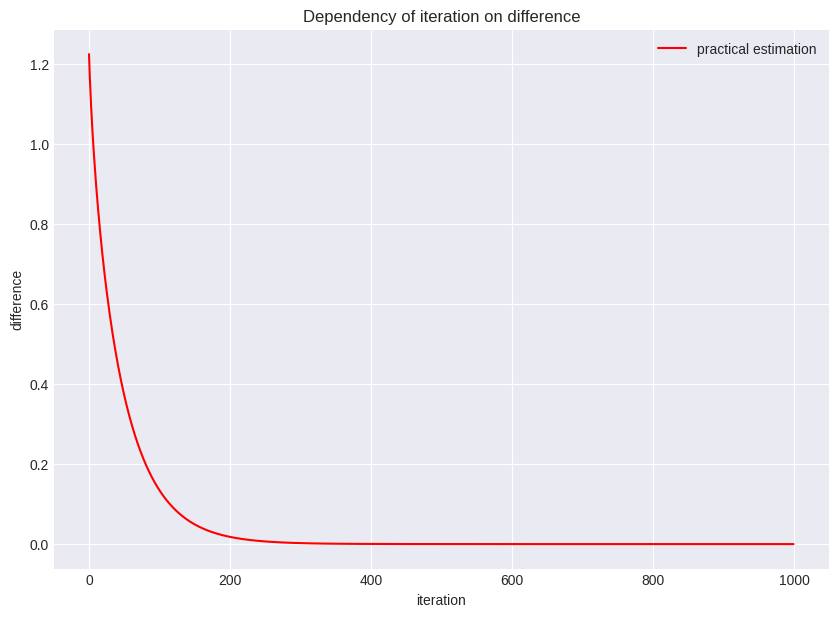

In [ ]:
#Возвращает x_sol
def find_solution(A, b):
  return np.dot(np.linalg.inv(A), b)

iterations = [i for i in range(10**3)] #Для построения графика
#Инициализация параметров для градиентного спуска
d = 50
m = 1
L = 100
A = np.diag(np.linspace(m, L, d))
b = np.random.randint(1, 2, (d, ))
x_0 = np.zeros(d)
x_sol = find_solution(A, b)

result = gradient_descent(f, nabla_f, x_0, x_sol, 0.01, A, b)
#Построение графиков
plt.figure(figsize = (10, 7))
plt.plot(iterations, result[1], markersize = 5, color = 'r', label = 'practical estimation')
plt.xlabel("iteration")
plt.ylabel("difference")
plt.title("Dependency of iteration on difference")
plt.legend()

**Вывод**: как можно увидеть по графику, он имеет логарифмический характер, значит и характер сходимости у нас логарифмический. Также можно увидеть, что разница становится меньше с каждым шагом, а в конце очень сильно приближается к 0 (с точностью до 9 знаков после запятой), как и должно быть.

__е). (1 балл)__ Добавьте на график теоретическую сходимость, полученную на лекции. Добавьте легенду, чтобы можно было отличить, какой график за что отвечает. Сделайте вывод.

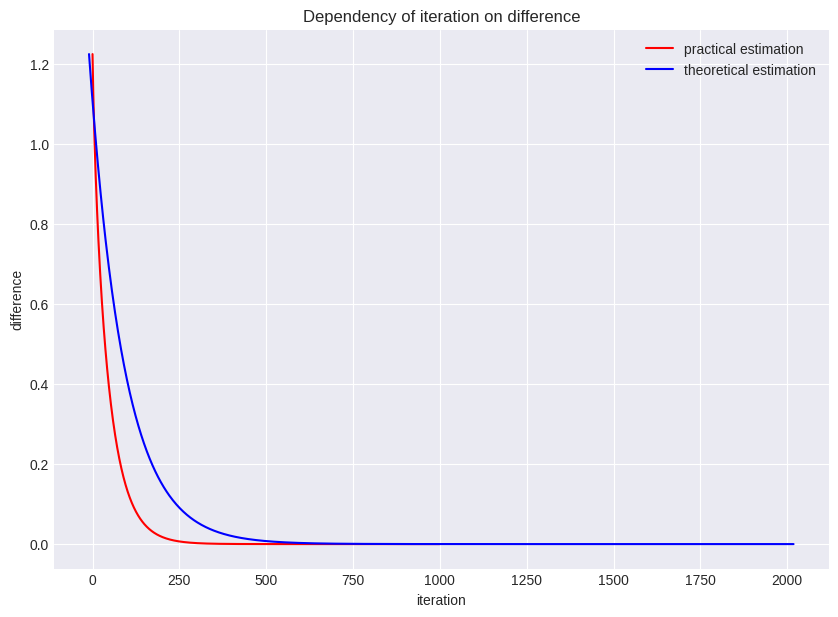

In [ ]:
theoretical_estimation = (L / m) * (np.log(np.linalg.norm(x_0 - x_sol) / result[1])) #Теоретическая оценка
#Построение графиков
plt.figure(figsize = (10, 7))
plt.plot(iterations, result[1], markersize = 5, color = 'r', label = 'practical estimation')
plt.plot(theoretical_estimation, result[1], markersize = 5, color = 'b', label = 'theoretical estimation')
plt.xlabel("iteration")
plt.ylabel("difference")
plt.title("Dependency of iteration on difference")
plt.legend()

**Вывод**: Теоретическая и практическая оценки практически совпадают, причем и та и другая имеет логарифмический характер и сходятся к 0, как и должно быть. Значит мы все сделали правильно.

__ж). (3 балла)__ Попробуйте метод с разными шагами (но постоянными в одном запуске) $\gamma_k = \gamma$. Проверьте диапозон от $0$ до $3/L$. Нанесите все новые запуски на график (теоретическую сходимость можно убрать). На каком шаге получен наибыстрейший результат. Как думаете почему?

Text(0.5, 1.0, 'Dependency of iteration on difference')

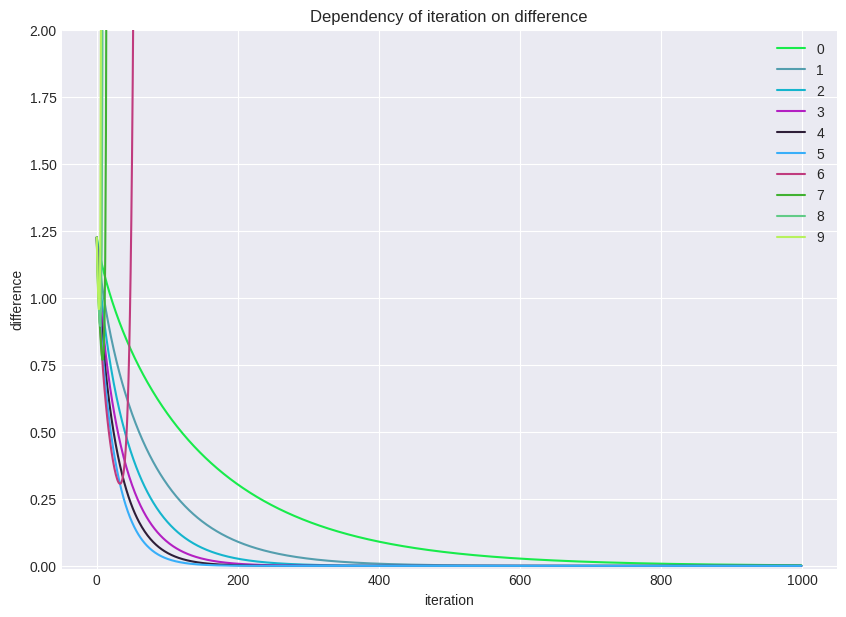

In [ ]:
import random
#Выбираем точность шага
step = 0.03 / 10
#Задаем шаг, который будет увеличиваться с каждой итерацией цикла
gamma_k = 0
plt.figure(figsize = (10, 7))
iterations = [i for i in range(0, 1000)] #Для построения графика
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(10)]
min_value = 1e9 #Эти значения нужны для выбора лучшего шага
min_iter = -1
for i in range(0, 10):
  gamma_k += step
  result = gradient_descent(f, nabla_f, x_0, x_sol, gamma_k, A, b)
  if min_value > min(result[1]):
    min_iter = i
    min_value = min(result[1])
  plt.plot(iterations, result[1], markersize = 5, color = color[i], label = str(i))
plt.xlabel("iteration")
plt.ylabel("difference")
plt.legend()
plt.ylim([-0.01, 2])
plt.title("Dependency of iteration on difference")

Здесь мы видим 10 графиков с зависимостью сходимости от итерации. Также видно, что график 5 (со значением шага, примерно, 0.18) сходится быстрее всего. Большее количество графиков было решено не чертить для большей наглядности.

Text(0.5, 1.0, 'Dependency of accuracy on step')

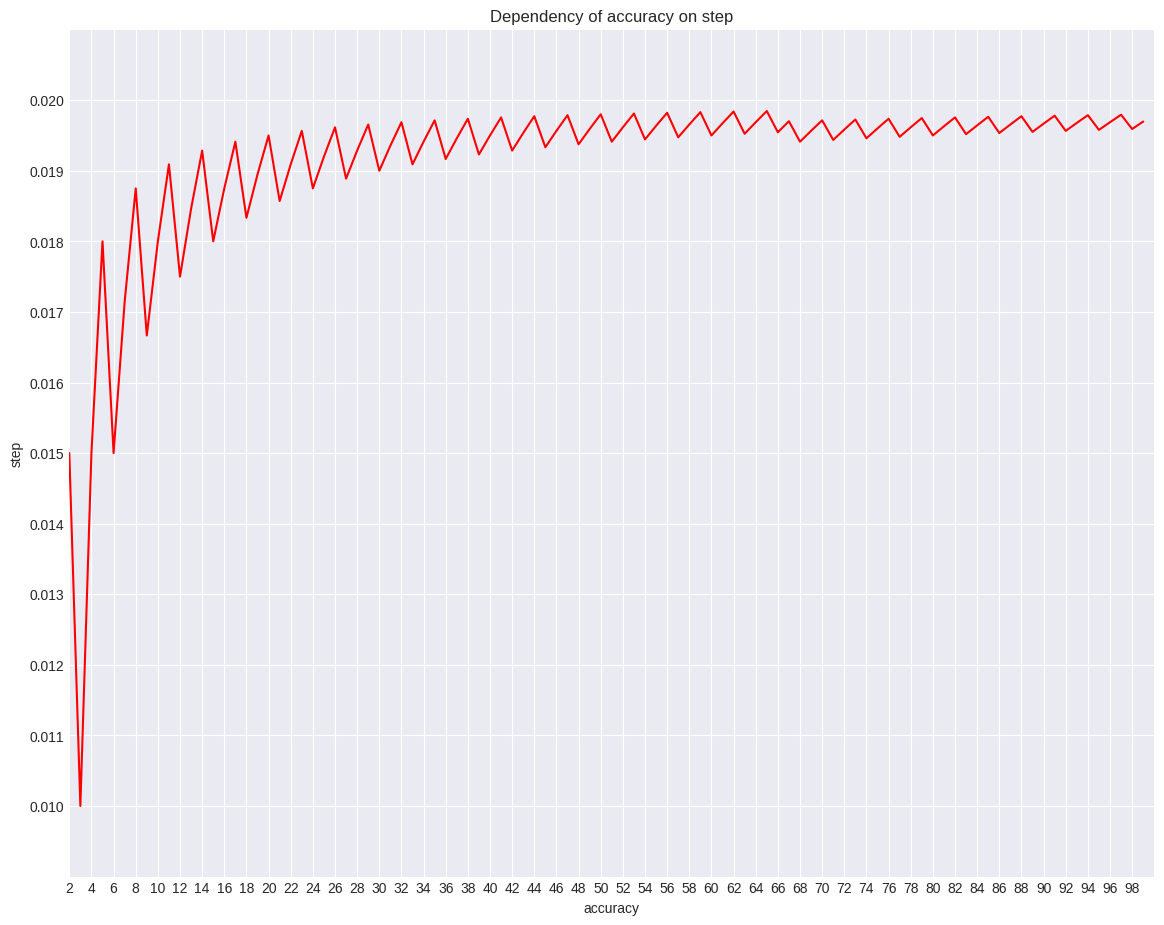

In [ ]:
min_max = []
steps = 100 #Максимальная точность шагов
for amount in range(2, steps):
  step = 0.03 / amount #Задаем текущую точность шага
  gamma_k = 0 #Задаем шаг
  min_value = 1e9 #Эти значения нужны для выбора лучшего шага
  min_iter = -1
  for i in range(0, amount): #Проходим по шагам с текущей точностью
    gamma_k += step
    result = gradient_descent(f, nabla_f, x_0, x_sol, gamma_k, A, b)
    if min_value > min(result[1]):
      min_iter = i
      min_value = min(result[1])
  min_max.append(min_iter * step + step) #Сохраняем лучший шаг для данной точности
#Построение графиков
plt.figure(figsize = (14, 11))
iterations = [i for i in range(2, steps)] #Для построения графиков
plt.plot(iterations, min_max, markersize = 5, color = 'r')
plt.xlabel("accuracy")
plt.ylabel("step")
plt.xticks([i for i in range(2, steps, 2)])
plt.yticks([i/1000 for i in range(10, 21, 1)])
plt.xlim([2, 100])
plt.ylim([0.009, 0.021])
plt.title("Dependency of accuracy on step")

Этот график был приведен (вне задания) для наглядности. Он показывает зависимость шага (ось ординат) от точности, которую мы выбираем. Тут достаточно хорошо видно, что шаг при увеличении точности стремится примерно к 0.198. Достаточно просто понять, почему это так, если взять выкладку из методички курса и немного ее почитать. Там на странице 77 в теореме 6.21 написано, что чтобы добиться такой теоретической оценки и точности сходимости в целом достаточно выбрать $γ_k = \frac{2}{μ + L} = \frac{2}{101} ≈ 0.019802$. Вот и ответ на поставленный в пункте ж) вопрос.

__з). (7 баллов)__  Исследуйте другие техники подбора шага:

1) Уменьшающийся с номером итерации шаг: $\gamma_k = \frac{\gamma}{\delta + k}$ или $\gamma_k = \frac{\gamma}{\delta + \sqrt{k}}$, где $\gamma$ и $\delta$ нужно подобрать отдельно. Какая конфигурация $\gamma$ и $\delta$ показала наилучший результат?

2) Наискорейший спуск: $\gamma_k = \arg\min_{\gamma} f(x_k - \gamma \nabla f(x_k))$. Как будете вычислять значение $\gamma_k$ в данном случае?

3) Шаг Поляка-Шора: $\gamma_k = \tfrac{f(x^k) - f(x^*)}{\alpha \|\nabla f(x^k)\|^2}$, где $\alpha \geq 1$ нужно подобрать отдельно. Какое $\alpha$ дало лучший результат?

Сравните все подходы подбора шага между собой (в том числе из предыдуших пунктов). Важно, что сравнивать нужно не только число итераций, но и время работы методов. Постройте графики сравнения и сделайте вывод.

In [ ]:
#ваше решение

### Часть 4. Матрично-векторное дифференцирование. Практика

__Задача. (всего 20 баллов)__ Перед Вами стоит задача приближения матрицы $X  \in \mathbb{R}^{N \times M}$ неизвестными матрицами $U \in \mathbb{R}^{N \times r}, V \in \mathbb{R}^{M \times r}$ заданной размерности $r$.

В качестве такого приближения предлагается использовать линейное представление $\hat{X} = U V^T$.

В рамках данного задания Вам предстоит решить задачу оптимизации функции *MSE*:
$$MSE(X, \hat{X}) = \frac{1}{N M} ||X - \hat{X} ||^2_F = \frac{1}{N M} ||X - U V^T ||^2_F.$$

__a). (3 балла)__ Выпишите формулы для градиентов $\nabla_U MSE, \nabla_V MSE$.

1) $d_{U}(\frac{1}{NM}||X - UV^T||^2_{F}) = \frac{2}{NM}||X - UV^T||_{F} * ⟨\frac{X - UV^T}{||X - UV^T||_{F}}, d_{U}(X - UV^T)⟩ = \frac{2}{NM}⟨X - UV^T, -V^TdU⟩ =$ <br>$= -\frac{2}{NM}⟨(X - UV^T)V, dU⟩ => ∇_{U}MSE = -\frac{2}{NM}(X - UV^T)V$<br>
2) $d_{V}(\frac{1}{NM}||X - UV^T||^2_{F}) = \frac{2}{NM}||X - UV^T||_{F} * ⟨\frac{X - UV^T}{||X - UV^T||_{F}}, d_{V}(X - UV^T)⟩ = \frac{2}{NM}⟨X - UV^T, -Ud(V^T)⟩ =$ <br>$= -\frac{2}{NM}⟨(X - UV^T)dV, U⟩ = -\frac{2}{NM}⟨(X - UV^T)^TU, dV⟩ => ∇_{V}MSE = -\frac{2}{NM}(X - UV^T)^TU$

__б). (10 баллов)__ Реализуйте версии градиентного спуска для данной задачи на библиотеках ```numpy```, ```jax``` и ```pytorch```. Сгенерируйте случайную матрицу $X$ с $N \geq 10000$, $M \geq 200$. Возьмите $r = 10$. Запустите все алгоритмы на 100 итераций (это мало для сравнения библиотек, но для теста работоспсобности кода - достаточно). Постройте графики значения $MSE$ для каждого из 3 алгоритмов: по оси абцисс - номер итерации, по ординат - MSE.

Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (так как на каждом графике будет три линии), толщина линий и т.д.. Графики должны быть удобны для чтения.

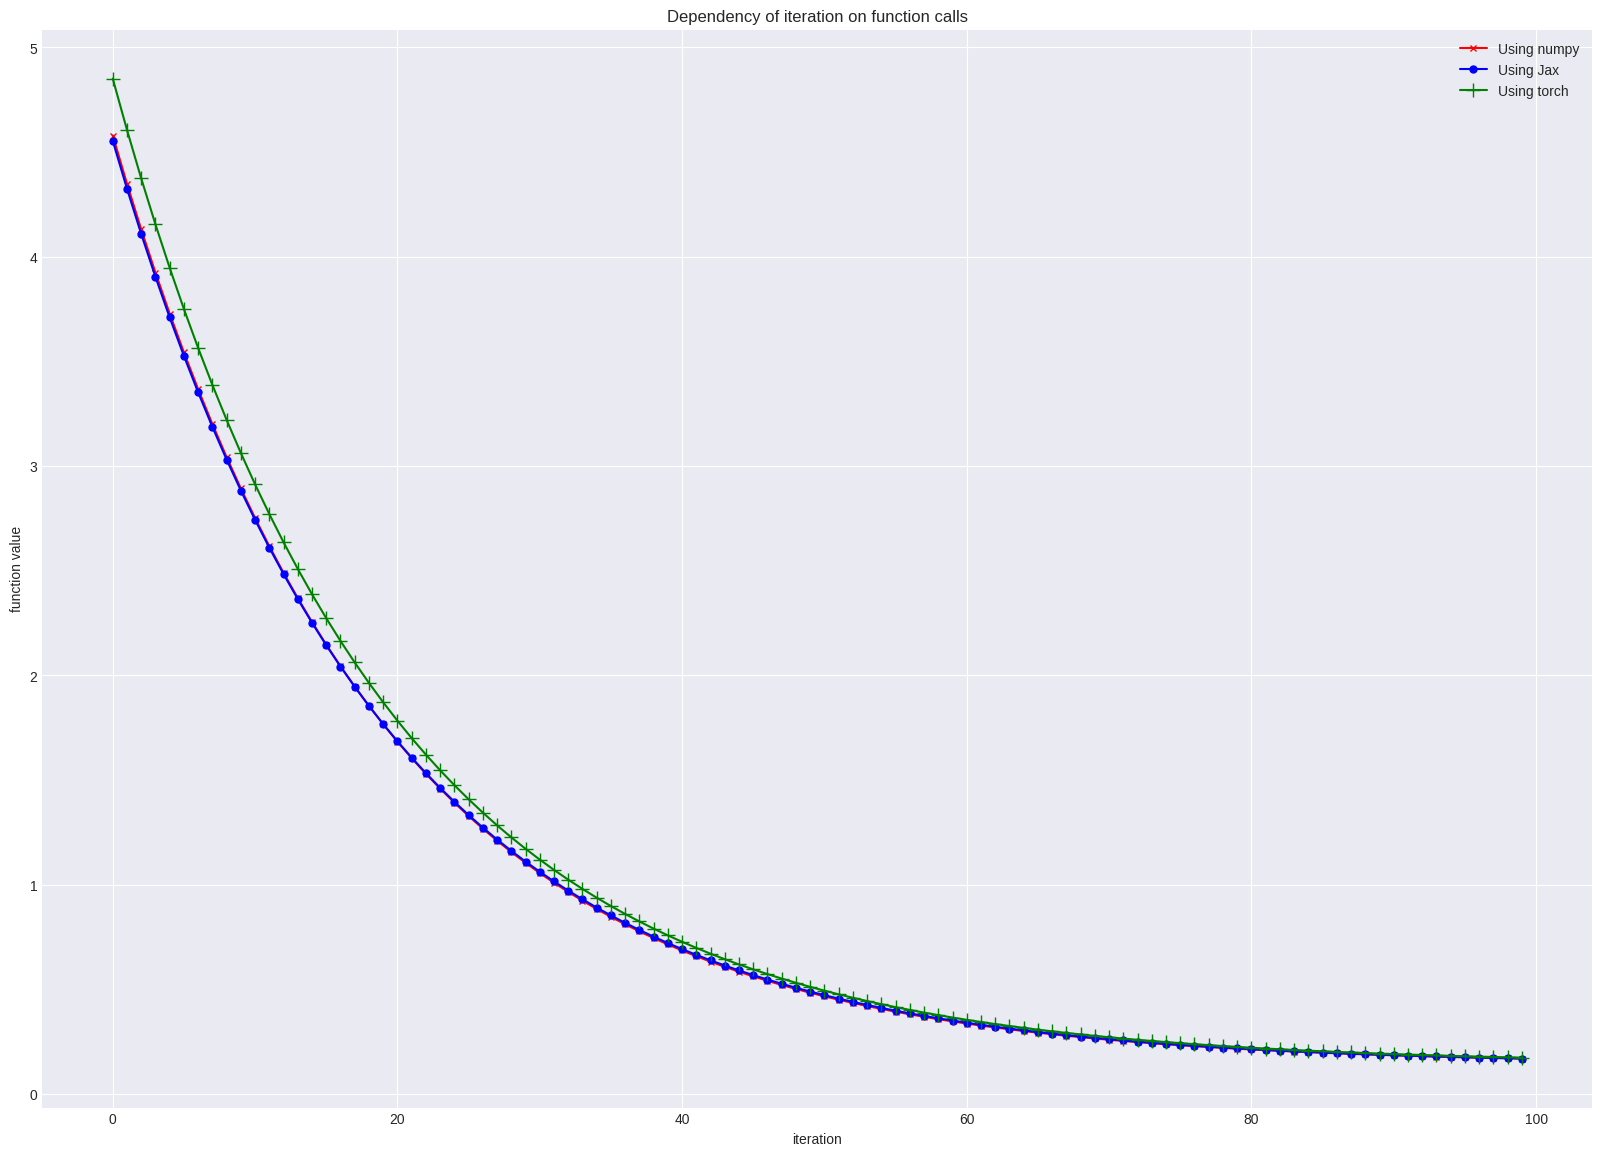

(10.327912330627441, 5.4034669399261475, 1.9924728870391846)

In [ ]:
iteration_num = [i for i in range(100)] #Для построения графиков

def main_func(N, M, r, if_picture): #Функция, в которой реализованы все три метода
  plt.figure(figsize = (20, 14))
  def numpy_realization(N, M, r): #Реализация через numpy
    def MSE(X, U, V):
      return ((1 / (N * M)) * np.linalg.norm(X - jnp.dot(U, V.T), 'fro') ** 2)
    start_time = time.time()
    X = np.random.rand(N, M)
    U = np.random.rand(N, r)
    V = np.random.rand(M, r)
    alpha = 1
    sp_V = [V]
    sp_U = [U]
    functions_values = [] #Для подсчета разницы на каждом шаге
    for i in range(100):
      functions_values.append(MSE(X, sp_U[i], sp_V[i]))
      sp_V.append(sp_V[i] - np.dot(alpha, ((-2 / (N * M)) * np.dot((X - np.dot(sp_U[i], sp_V[i].T)).T, U))))
      sp_U.append(sp_U[i] - np.dot(alpha, ((-2 / (N * M)) * np.dot(X - (np.dot(sp_U[i], sp_V[i].T)), V))))
    time1 = time.time() - start_time
    if if_picture:
      plt.plot(iteration_num, functions_values, marker = 'x', markersize = 5, color = 'r', label = "Using numpy")
    return time1




  def jax_realization(N, M, r): #Реализация через jax
    def MSE(X, U, V):
      return ((1 / (N * M)) * jnp.linalg.norm(X - jnp.dot(U, V.T), 'fro') ** 2)
    start_time = time.time()
    X = np.random.rand(N, M)
    U = np.random.rand(N, r)
    V = np.random.rand(M, r)
    sp_V = [V]
    sp_U = [U]
    alpha = 1
    functions_values = [] #Для подсчета разницы на каждом шаге
    for i in range(100):
      functions_values.append(MSE(X, sp_U[i], sp_V[i]))
      sp_V.append(sp_V[i] - alpha * grad(MSE, argnums=2)(X, sp_U[i], sp_V[i]))
      sp_U.append(sp_U[i] - alpha *
      grad(MSE, argnums=1)(X, sp_U[i], sp_V[i]))
    time2 = time.time() - start_time
    if if_picture:
      plt.plot(iteration_num, functions_values, marker = 'o', markersize = 5, color = 'b', label = "Using Jax")
    return time2



  def pytorch_realization(N, M, r): #Реализация через pytorch
    def MSE(X, U, V):
      return ((1 / (N * M)) * tr.linalg.norm(X - tr.matmul(U, V.T), 'fro') ** 2)
    start_time = time.time()

    X = tr.rand(N, M, requires_grad=True)
    U = tr.rand(N, r, requires_grad=True)
    V = tr.rand(M, r, requires_grad=True)
    alpha = 1
    functions_values = [] #Для подсчета разницы на каждом шаге
    for i in range(100):
      functions_values.append(MSE(X, U, V).detach().numpy())
      MSE_v = MSE(X, U, V)
      MSE_v.backward()
      updated_V = V - alpha * V.grad
      updated_U = U - alpha * U.grad
      V.data = updated_V
      U.data = updated_U
      V.grad.zero_()
      U.grad.zero_()
    time3 = time.time() - start_time
    if if_picture:
      plt.plot(iteration_num, functions_values, marker = '+', markersize = 10, color = 'green', label = "Using torch")
    return time3

  time1 = numpy_realization(N, M, r)
  time2 = jax_realization(N, M, r)
  time3 = pytorch_realization(N, M, r)
  if if_picture:
    plt.xlabel("iteration")
    plt.ylabel("function value")
    plt.title("Dependency of iteration on function calls")
    plt.legend()
    plt.show()
  return (time1, time2, time3)
main_func(10000, 200, 10, 1)

__г). (7 баллов)__ Оцените эффективность трёх реализаций по сходимости до plt.show()заданной точности:

- ***проследите, что сравниваете на одном device;***
- добавьте возможность измерения времени работы алгоритмов;
- изменяя $r$ при фиксированной матрице $X$ (случайная с $N \geq 10000$, $M \geq 200$), нарисуйте зависимость времени сходимости до точности $MSE \leq 10^{-3}$ от $r$;
- при фиксированных $r = 10$ и $M \geq 200$, показать характер поведения аналогичного графика при изменяющемся $N$;
- сделайте выводы.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jax import grad
import jax.numpy as jnp
import torch as tr
import time


#Надо немного модернизировать функцию, потому что за 100 итераций алгоритм не сходится к такой маленькой точности
#Поэтому будем запускать не на 100 итераций, а пока точность не станет такой, как нам надо
def main_func(N, M, r):
  X = np.random.rand(N, M)
  U = np.random.rand(N, r)
  V = np.random.rand(M, r)
  plt.figure(figsize = (20, 14))
  def numpy_realization(N, M, r, X, U, V): #Реализация через numpy
    def MSE(X, U, V):
      return ((1 / (N * M)) * np.linalg.norm(X - np.dot(U, V.T), 'fro') ** 2)
    start_time = time.time() #Для подсчета времени
    alpha = 10
    sp_V = [V]
    sp_U = [U]
    functions_values = [MSE(X, U, V)] #Для подсчета разницы на каждом шаге
    i = 0
    while abs(functions_values[-1]) / functions_values[0]  > 0.01:
      functions_values.append(MSE(X, sp_U[i], sp_V[i]) / functions_values[0])
      sp_V.append(sp_V[i] - np.dot(alpha, ((-2 / (N * M)) * np.dot((X - np.dot(sp_U[i], sp_V[i].T)).T, U))))
      sp_U.append(sp_U[i] - np.dot(alpha, ((-2 / (N * M)) * np.dot(X - (np.dot(sp_U[i], sp_V[i].T)), V))))
      i += 1
    time1 = time.time() - start_time
    return time1




  def jax_realization(N, M, r, X, U, V): #Реализация через jax
    def MSE(X, U, V):
      return ((1 / (N * M)) * jnp.linalg.norm(X - jnp.dot(U, V.T), 'fro') ** 2)
    start_time = time.time() #Для подсчета времени
    sp_V = [V]
    sp_U = [U]
    alpha = 10
    functions_values = [MSE(X, U, V)] #Для подсчета разницы на каждом шаге
    i = 0
    while abs(functions_values[-1]) / functions_values[0] > 0.01:
      functions_values.append(MSE(X, sp_U[i], sp_V[i]) / functions_values[0])
      sp_V.append(sp_V[i] - alpha * grad(MSE, argnums=2)(X, sp_U[i], sp_V[i]))
      sp_U.append(sp_U[i] - alpha *
      grad(MSE, argnums=1)(X, sp_U[i], sp_V[i]))
      i += 1
    time2 = time.time() - start_time
    return time2



  def pytorch_realization(N, M, r, X, U, V): #Реализация через pytorch
    X = tr.tensor(X)
    U = tr.tensor(U, requires_grad=True)
    V = tr.tensor(V, requires_grad=True)
    def MSE(X, U, V):
      return ((1 / (N * M)) * tr.linalg.norm(X - tr.matmul(U, V.T), 'fro') ** 2)
    start_time = time.time() #Для подсчета времени

    alpha = 10
    functions_values = [MSE(X, U, V)] #Для подсчета разницы на каждом шаге
    while abs(functions_values[-1]) / functions_values[0] > 0.01:
      functions_values.append((MSE(X, U, V) / functions_values[0]).detach().numpy())
      MSE_v = MSE(X, U, V)
      MSE_v.backward()
      updated_V = V - alpha * V.grad
      updated_U = U - alpha * U.grad
      V.data = updated_V
      U.data = updated_U
      V.grad.zero_()
      U.grad.zero_()
    time3 = time.time() - start_time
    return time3

  time1 = numpy_realization(N, M, r, X, U, V)
  time2 = jax_realization(N, M, r, X, U, V)
  time3 = pytorch_realization(N, M, r, X, U, V)
  return (time1, time2, time3)

<ipython-input-41-75215241ed23>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (20, 14))


Text(0.5, 1.0, 'Dependency of r value on time')

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

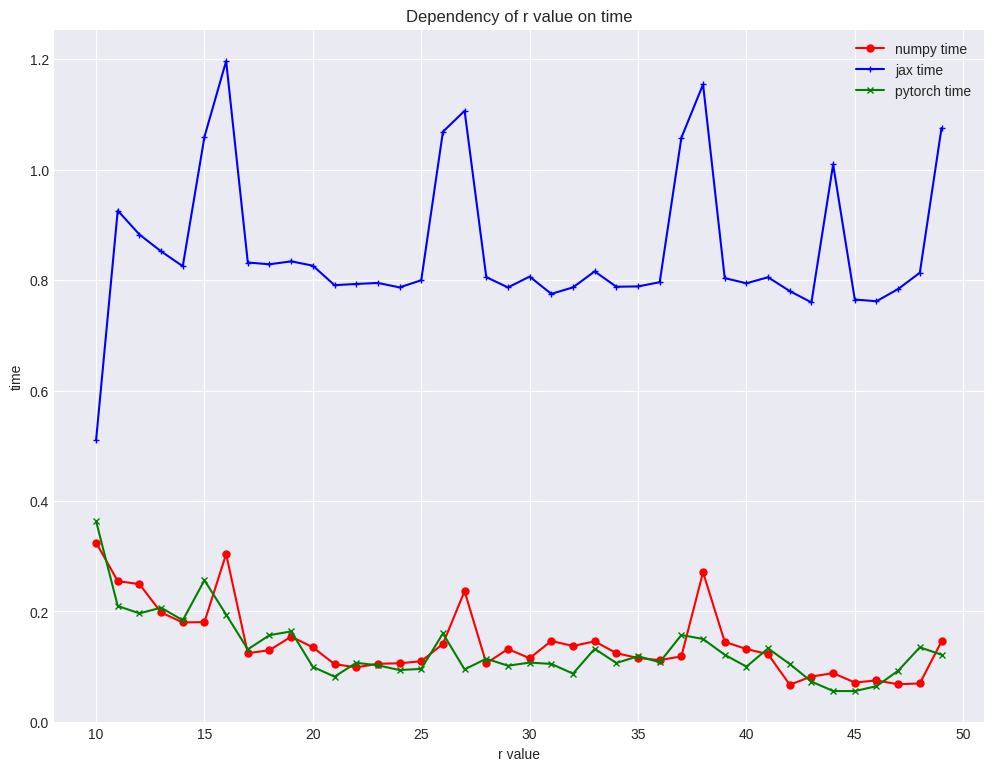

In [ ]:
r_dependence = [i for i in range(10, 50)]
time_line_1 = []
time_line_2 = []
time_line_3 = []
for r in range(10, 50):
  time_vec = main_func(10000, 200, r)
  time_line_1.append(time_vec[0])
  time_line_2.append(time_vec[1])
  time_line_3.append(time_vec[2])

plt.figure(figsize = (12, 9))
plt.plot(r_dependence, time_line_1, marker = 'o', markersize = 5, color = 'r', label = 'numpy time')
plt.plot(r_dependence, time_line_2, marker = '+', markersize = 5, color = 'b', label = 'jax time')
plt.plot(r_dependence, time_line_3, marker = 'x', markersize = 5, color = 'green', label = 'pytorch time')
plt.legend()
plt.xlabel("r value")
plt.ylabel("time")
plt.title("Dependency of r value on time")



<ipython-input-41-75215241ed23>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (20, 14))


Text(0.5, 1.0, 'Dependency of N value on time')

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

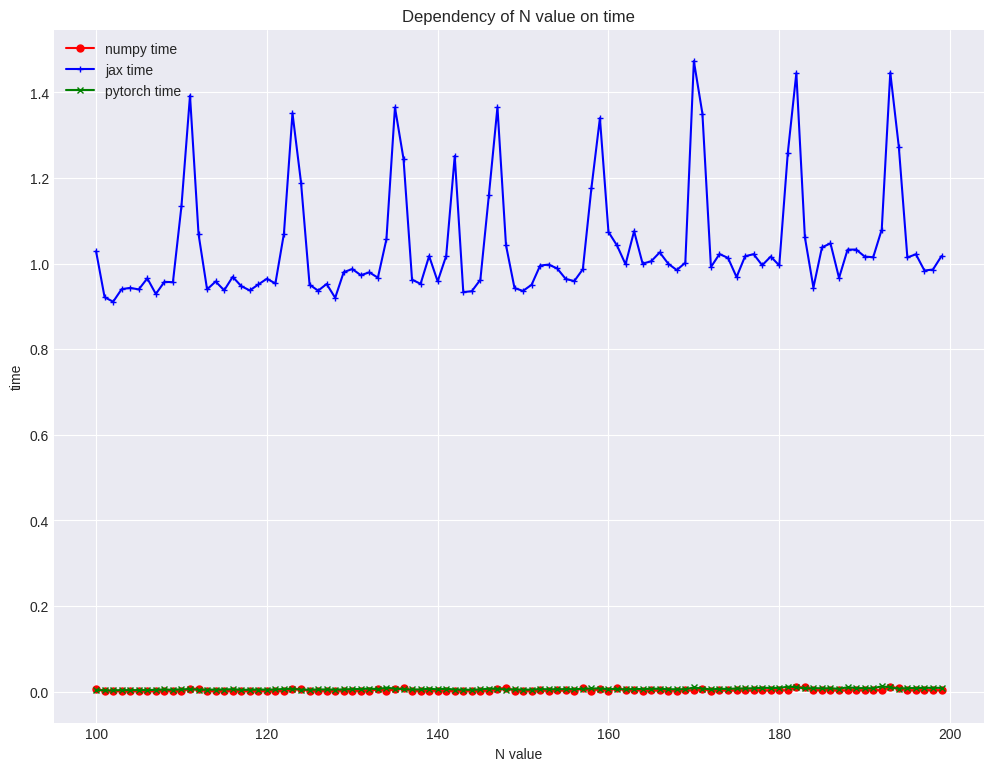

In [ ]:
N_dependence = [i for i in range(100, 200)]
time_line_1 = []
time_line_2 = []
time_line_3 = []
for N in range(100, 200):
  time_vec = main_func(N, 200, 10)
  time_line_1.append(time_vec[0])
  time_line_2.append(time_vec[1])
  time_line_3.append(time_vec[2])
plt.figure(figsize = (12, 9))
plt.plot(N_dependence, time_line_1, marker = 'o', markersize = 5, color = 'r', label = 'numpy time')
plt.plot(N_dependence, time_line_2, marker = '+', markersize = 5, color = 'b', label = 'jax time')
plt.plot(N_dependence, time_line_3, marker = 'x', markersize = 5, color = 'green', label = 'pytorch time')
plt.legend()
plt.xlabel("N value")
plt.ylabel("time")
plt.title("Dependency of N value on time")

**Выводы:**<br>
1) При изменении r видим, что графики numpy и pytorch ведут себя спокойно, практически без сильных выбросов, также pytorch почти всегда быстрее остальных реализаций. Реализация же через Jax при больших r показывает не самые лучшие результаты.<br>
2)При изменении N видим, что графики numpy и pytorch почти вырождаются в прямые (то есть всегда работают почти за одинаковое константное время близкое к 0).Реализация же через Jax при любых N показывает не самые лучшие результаты.<br>
Предположение: Судя по тому, что среда TPU совсем не видит jax, а среда CPU показывает примерно такие же графики, как и GPU, можно сказать, что либо Jax и правда работает сильно дольше других реализаций (что странно, конкретно для numpy), либо google collab не очень хорошо адаптирован под jax/наоборот.